In [29]:
import psycopg2
import pandas as pd
import matplotlib

In [30]:
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="password")
cur = conn.cursor()

In [31]:
def getTable(name):
  cur.execute('SELECT * from ' + name)
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

def getAverageMeasure(measure, label):
  cur.execute("select AVG(F."+measure+") as "+label+", C.short_name FROM fact as F, country as C, event as E WHERE F.country_key = C.key and F.event_key = E.key Group by C.short_name")
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

def executeQuery(query):
  cur.execute(query)
  return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])
  
def graphCorrelation(measure, attribute, factor):
  selection = executeQuery('Select Distinct F.' + measure + ', A.' + factor + ' from Fact as F, ' + attribute + ' as A where F.' + attribute + '_key = A.key')
  selection[measure] = selection[measure].astype(float)
  selection[factor] = selection[factor].astype(float)
  selection.plot.scatter(x=measure, y=factor)


<AxesSubplot:xlabel='short_name'>

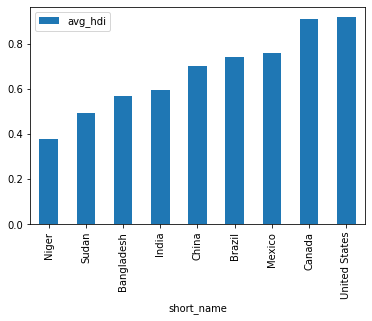

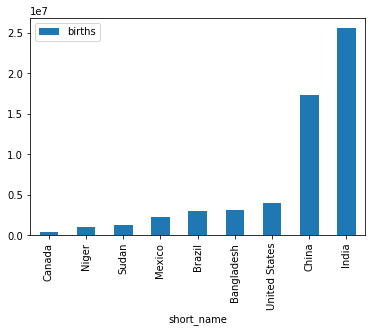

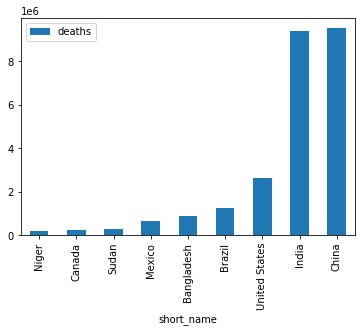

In [32]:
HDI = getAverageMeasure('hdi', 'avg_hdi')
HDI['avg_hdi'] = HDI['avg_hdi'].astype(float)
HDI = HDI.sort_values('avg_hdi')
HDI.plot.bar(x='short_name', y='avg_hdi')

BIRTHS = getAverageMeasure('avg_births', 'births')
BIRTHS['births'] = BIRTHS['births'].astype(float)
BIRTHS = BIRTHS.sort_values('births')
BIRTHS.plot.bar(x='short_name', y='births')


DEATHS = getAverageMeasure('avg_deaths', 'deaths')
DEATHS['deaths'] = DEATHS['deaths'].astype(float)
DEATHS = DEATHS.sort_values('deaths')
DEATHS.plot.bar(x='short_name', y='deaths')

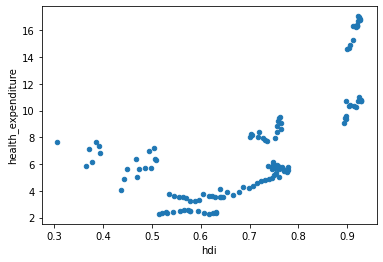

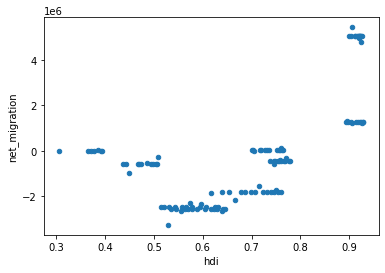

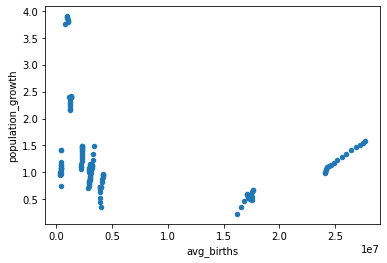

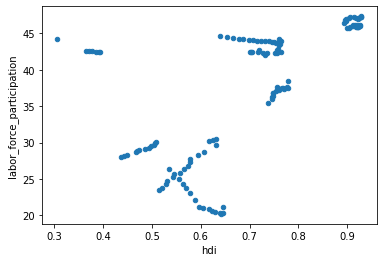

In [34]:
# health_expenditure = executeQuery('Select Distinct F.hdi, H.health_expenditure from Fact as F, Health as H where F.health_key = H.key')
# health_expenditure['hdi'] = health_expenditure['hdi'].astype(float)
# health_expenditure['health_expenditure'] = health_expenditure['health_expenditure'].astype(float)
# health_expenditure.plot.scatter(x='hdi', y='health_expenditure')

graphCorrelation('hdi', 'health', 'health_expenditure')
graphCorrelation('hdi', 'population', 'net_migration')
graphCorrelation('avg_births', 'population', 'population_growth')
graphCorrelation('hdi', 'quality_of_life', 'labor_force_participation')


# uhc_service_coverage_index = executeQuery('Select Distinct F.hdi, H.uhc_service_coverage_index from Fact as F, Health as H where F.health_key = H.key')
# uhc_service_coverage_index['hdi'] = uhc_service_coverage_index['hdi'].astype(float)
# uhc_service_coverage_index['uhc_service_coverage_index'] = uhc_service_coverage_index['uhc_service_coverage_index'].astype(float)
# uhc_service_coverage_index.plot.scatter(x='hdi', y='uhc_service_coverage_index')


